In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [233]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

val_datagen=ImageDataGenerator(rescale=1./255)

In [234]:
train_generator = train_datagen.flow_from_directory(
        r'E:\Notebooks\Pes-Mtech\Deep Learning\Presentation\ASL\ASL_classification\output\train',
        target_size=(64, 64),
        batch_size=8,
        class_mode='categorical')

Found 518 images belonging to 26 classes.


In [235]:
val_generator = val_datagen.flow_from_directory(
        r'E:\Notebooks\Pes-Mtech\Deep Learning\Presentation\ASL\ASL_classification\output\val',
        target_size=(64, 64),
        batch_size=8,
        class_mode='categorical')

Found 130 images belonging to 26 classes.


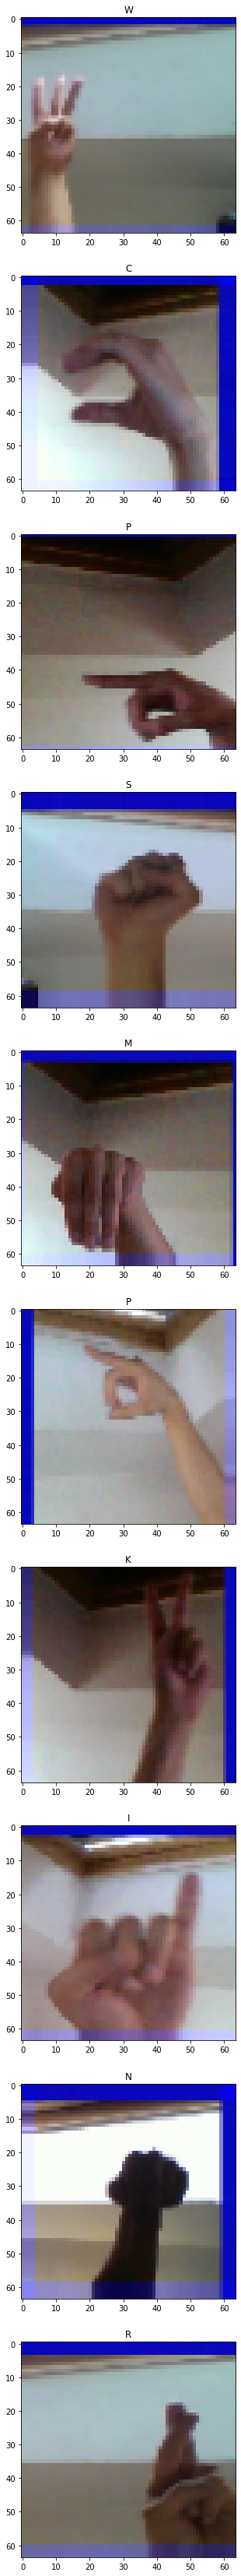

In [289]:
plt.figure(figsize=(60,60))
ax=0
for i in range(10):
    j=np.random.randint(low=0,high=17)
    k=np.random.randint(low=0,high=5)
    ax=plt.subplot(10,1,(i+1))
    ax.imshow(train_generator[j][0][k])
    ax.title.set_text(list(train_generator.class_indices.keys())[np.argmax(train_generator[j][1][k])])

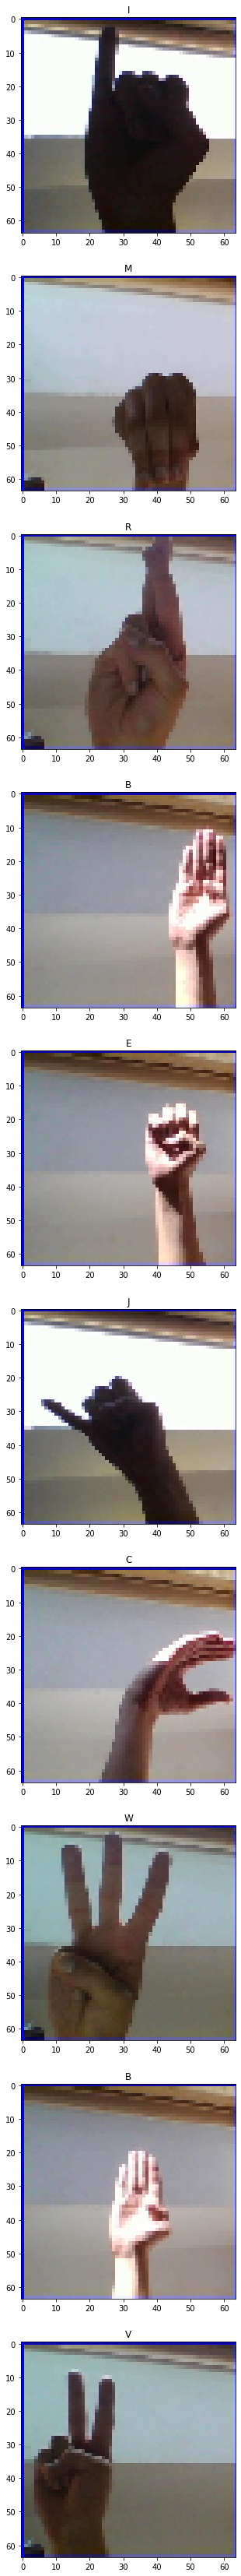

In [291]:
plt.figure(figsize=(60,60))
ax=0
for i in range(10):
    j=np.random.randint(low=0,high=17)
    k=np.random.randint(low=0,high=2)
    ax=plt.subplot(10,1,(i+1))
    ax.imshow(val_generator[j][0][k])
    ax.title.set_text(list(train_generator.class_indices.keys())[np.argmax(val_generator[j][1][k])])

In [246]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping

In [247]:
from tensorflow.keras.optimizers import Adam

In [248]:
cnn=Sequential()

cnn.add(Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Conv2D(128,(3,3),activation='relu',input_shape=(64,64,3)))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Dropout(0.5))

cnn.add(Flatten())


cnn.add(Dense(2048,activation='relu'))
cnn.add(Dense(26,activation='softmax'))

In [249]:
adam=Adam(learning_rate=0.0001)

In [250]:
cnn.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [251]:
callback=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5)
model1=cnn.fit_generator(train_generator,steps_per_epoch=519//8,epochs=50,validation_data=val_generator,validation_steps=129//8,callbacks=[callback])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 64 steps, validate for 16 steps
Epoch 1/50
64/64 [==============================] - 26s 407ms/step - loss: 3.2828 - accuracy: 0.0510 - val_loss: 3.1650 - val_accuracy: 0.1328
Epoch 2/50
64/64 [==============================] - 23s 363ms/step - loss: 3.0973 - accuracy: 0.1314 - val_loss: 2.8596 - val_accuracy: 0.1953
Epoch 3/50
64/64 [==============================] - 24s 375ms/step - loss: 2.7540 - accuracy: 0.2471 - val_loss: 2.4701 - val_accuracy: 0.3906
Epoch 4/50
64/64 [==============================] - 24s 377ms/step - loss: 2.3838 - accuracy: 0.3294 - val_loss: 2.1041 - val_accuracy: 0.4453
Epoch 5/50
64/64 [==============================] - 24s 375ms/step - loss: 2.0495 - accuracy: 0.4373 - val_loss: 1.9053 - val_accuracy: 0.5547
Epoch 6/50
64/64 [==============================] - 24s 381ms/step - loss: 1.7330 - accuracy: 0.5137 - val_loss: 1.6119 - val_accuracy: 0.5234
Epoch 7/50
64/64 [==============================] 

In [252]:
  cnn.evaluate_generator(val_generator)

  ...
    to  
  ['...']


[0.8521733360693735, 0.83076924]

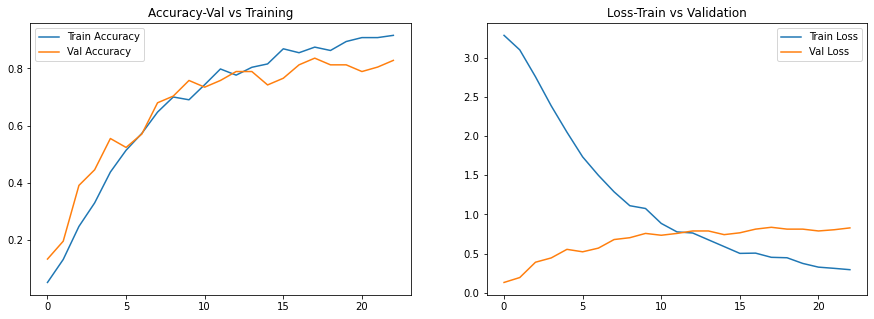

In [253]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(1,2,1)
ax1.plot(model1.history['accuracy'],label='Train Accuracy')
ax1.plot(model1.history['val_accuracy'],label='Val Accuracy')
ax1.legend(loc='best')
ax1.title.set_text('Accuracy-Val vs Training')

ax2=plt.subplot(1,2,2)
ax2.plot(model1.history['loss'],label='Train Loss')
ax2.plot(model1.history['val_accuracy'],label='Val Loss')
ax2.legend(loc='best')
ax2.title.set_text('Loss-Train vs Validation')

In [278]:
test_image=val_generator[16][0][1]
test_image=np.reshape(test_image,(1,*test_image.shape))
predict=cnn.predict(test_image)
#predict=[1 if i>0.5 else 0 for i in predict]
list(train_generator.class_indices.keys())[np.argmax(predict)]

list(train_generator.class_indices.keys())[np.argmax(val_generator[0][1][0])]

'B'

In [282]:
np.random.randint(0,17,1)[0]

0

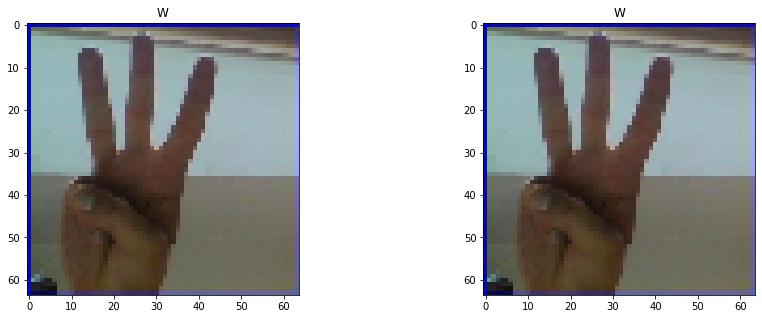

In [284]:
plt.figure(figsize=(15,5))

j=np.random.randint(0,17,1)[0]
k=np.random.randint(0,2,1)[0]
ax1=plt.subplot(1,2,1)
ax1.imshow(val_generator[j][0][k])
ax1.title.set_text(list(train_generator.class_indices.keys())[np.argmax(val_generator[j][1][k])])

ax2=plt.subplot(1,2,2)
test_image=val_generator[j][0][k]
test_image=np.reshape(test_image,(1,*test_image.shape))
predict=cnn.predict(test_image)
ax2.imshow(val_generator[j][0][k])
ax2.title.set_text(list(train_generator.class_indices.keys())[np.argmax(predict)])



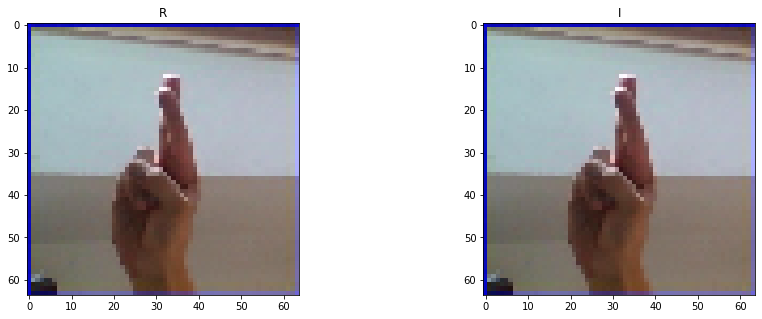

In [285]:
plt.figure(figsize=(15,5))

j=np.random.randint(0,17,1)[0]
k=np.random.randint(0,2,1)[0]
ax1=plt.subplot(1,2,1)
ax1.imshow(val_generator[j][0][k])
ax1.title.set_text(list(train_generator.class_indices.keys())[np.argmax(val_generator[j][1][k])])

ax2=plt.subplot(1,2,2)
test_image=val_generator[j][0][k]
test_image=np.reshape(test_image,(1,*test_image.shape))
predict=cnn.predict(test_image)
ax2.imshow(val_generator[j][0][k])
ax2.title.set_text(list(train_generator.class_indices.keys())[np.argmax(predict)])

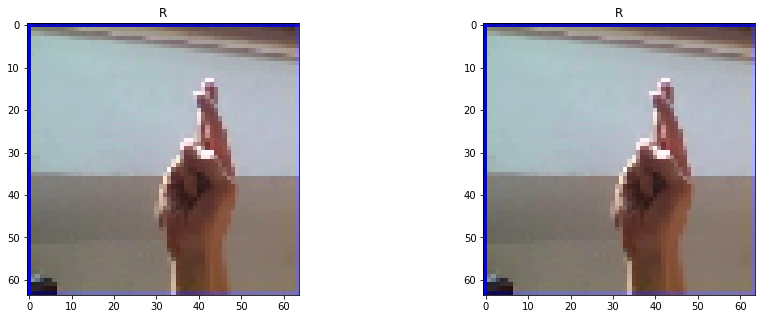

In [286]:
plt.figure(figsize=(15,5))

j=np.random.randint(0,17,1)[0]
k=np.random.randint(0,2,1)[0]
ax1=plt.subplot(1,2,1)
ax1.imshow(val_generator[j][0][k])
ax1.title.set_text(list(train_generator.class_indices.keys())[np.argmax(val_generator[j][1][k])])

ax2=plt.subplot(1,2,2)
test_image=val_generator[j][0][k]
test_image=np.reshape(test_image,(1,*test_image.shape))
predict=cnn.predict(test_image)
ax2.imshow(val_generator[j][0][k])
ax2.title.set_text(list(train_generator.class_indices.keys())[np.argmax(predict)])

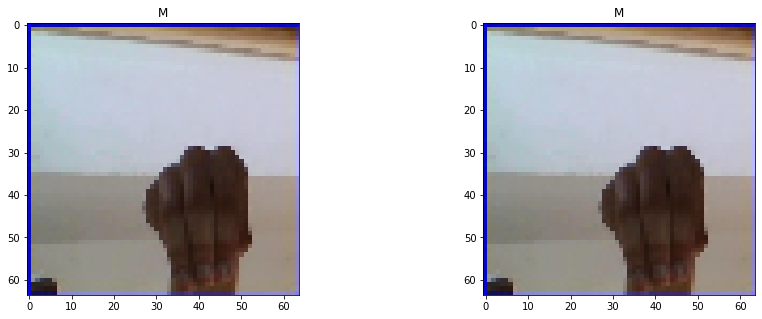

In [287]:
plt.figure(figsize=(15,5))

j=np.random.randint(0,17,1)[0]
k=np.random.randint(0,2,1)[0]
ax1=plt.subplot(1,2,1)
ax1.imshow(val_generator[j][0][k])
ax1.title.set_text(list(train_generator.class_indices.keys())[np.argmax(val_generator[j][1][k])])

ax2=plt.subplot(1,2,2)
test_image=val_generator[j][0][k]
test_image=np.reshape(test_image,(1,*test_image.shape))
predict=cnn.predict(test_image)
ax2.imshow(val_generator[j][0][k])
ax2.title.set_text(list(train_generator.class_indices.keys())[np.argmax(predict)])

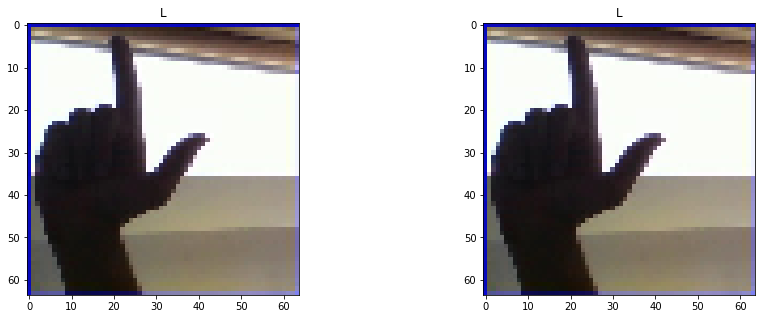

In [288]:
plt.figure(figsize=(15,5))

j=np.random.randint(0,17,1)[0]
k=np.random.randint(0,2,1)[0]
ax1=plt.subplot(1,2,1)
ax1.imshow(val_generator[j][0][k])
ax1.title.set_text(list(train_generator.class_indices.keys())[np.argmax(val_generator[j][1][k])])

ax2=plt.subplot(1,2,2)
test_image=val_generator[j][0][k]
test_image=np.reshape(test_image,(1,*test_image.shape))
predict=cnn.predict(test_image)
ax2.imshow(val_generator[j][0][k])
ax2.title.set_text(list(train_generator.class_indices.keys())[np.argmax(predict)])